# Comparing FFNN with Linear Regression Performance

In this notebook, we will compare the performance of a feedforward neural network with ridge regression for approximating 3 different functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from feedforward_nn import NeuralNetwork
from regression_cost_funcs import OLSCost, RidgeCost
from gradient_descent import GradientDescent

from sklearn.model_selection import train_test_split

## Linear function

First, we will consider the function 
$$f(x, y) = x + 2y.$$
We generate points $(x_i, y_i) \in [0,1] \times [0,1]$, and let our dependent variable be $z_i = f(x_i, y_i) + \epsilon_i$ for $\epsilon_i \sim N(0, \sigma^2)$.

In [2]:
from data_generation import linear_function, generate_data_linear

In [3]:
N = 50
sigma2 = 0.1
seed = 562

X, z, z_true = generate_data_linear(N, sigma2, seed)

# Split into train and test
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=seed)

We first analyze approximate using linear gradient descent + linear regression

In [4]:
def gradient_descent_execution(X, w0, z, model, max_iter = 200, eta = 0.01):
    batch_size = 10
    store_extra = True

    gd = GradientDescent(batch_size=batch_size, store_extra=store_extra)
    w = gd.train(X, w0, z, model, eta, max_iter)
    return w, gd

In [5]:
ols = OLSCost()
w0 = np.zeros((2, 1))
w, gd = gradient_descent_execution(X_train, w0, z_train, ols)

true_coefficients = [1, 2]
print("Estimated coefficients:", *w.flatten())
print("True coefficients:", *true_coefficients)
print("Train cost:", gd.costs[-1])
print("Test cost:", ols.cost(X_test, w, z_test))

Estimated coefficients: 1.1842771262917122 1.8820610863843676
True coefficients: 1 2
Train cost: 0.009838080677997274
Test cost: 0.007058050744097229


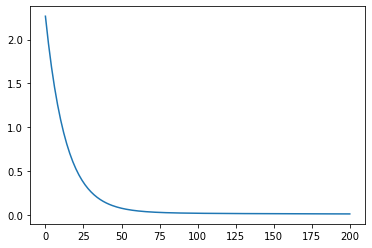

In [6]:
# Plot the cost function
plt.plot(gd.costs)
plt.show()

Next, we repeat the analysis for a neural network with 2 hidden layers consisting of 2 nodes.

In [7]:
layers = [2, 4, 4, 4, 1]
nn = NeuralNetwork(layers, activation="sigmoid", output_activation="linear", regularization=0)
w0 = nn.wb()
w, gd = gradient_descent_execution(X_train, w0, z_train, nn)

print("Train cost:", gd.costs[-1])
print("Test cost:", nn.cost(X_test, w, z_test))

Train cost: 0.4552947840748775
Test cost: 0.5755323974511743


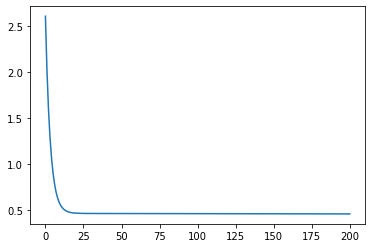

In [8]:
# Plot the cost function
plt.plot(gd.costs)
plt.show()

## Franke Function

We repeat a similar analysis for the Franke Function

In [9]:
# TODO

## Non-linear function: XOR

In [10]:
from data_generation import generate_xor_data

In [11]:
# Generate XOR data
N = 40
seed = 562

X, z = generate_xor_data()

We approximate the binary XOR with OLS

In [12]:
ols = OLSCost()
w0 = np.zeros((2, 1))
w, gd = gradient_descent_execution(X, w0, z, ols)

print("Estimated coefficients:", *w.flatten())
print("Train cost:", gd.costs[-1])

Estimated coefficients: 0.31711056954050326 0.31711056954050326
Train cost: 0.33372810043095036


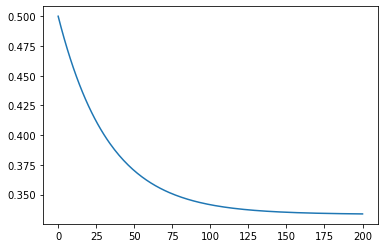

In [13]:
# Plot the cost function
plt.plot(gd.costs)
plt.show()

In [14]:
# Print predictions
preds = ols.predict(X, w)
for i in range(len(preds)):
    print(preds[i], z[i])

[0.63422114] [0]
[0.31711057] [1]
[0.31711057] [1]
[0.] [0]


Next, we approximate it with a simple neural network

In [15]:
layers = [2, 4, 4, 1]
nn = NeuralNetwork(layers, activation="relu", output_activation="sigmoid", regularization=0)

w0 = nn.wb()
w, gd = gradient_descent_execution(X, w0, z, nn, max_iter=2000, eta=0.1) # Note the increased number of epochs

print("Cost:", gd.costs[-1])

Cost: 0.001950650980647709


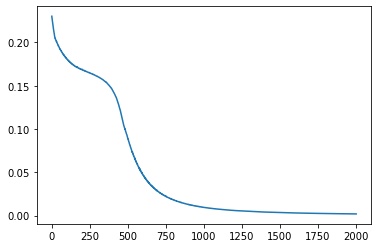

In [16]:
# Plot the cost function
plt.plot(gd.costs)
plt.show()

In [17]:
# Print predictions
preds = nn.predict(X, w)

for i in range(len(preds)):
    print(preds[i], z[i])

[0.02087407] [0]
[0.98135135] [1]
[0.92240133] [1]
[0.03158403] [0]


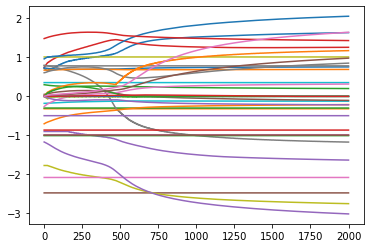

In [18]:
# Plot weights
weights = gd.weights
for i in range(len(w)):
    plt.plot(weights[:, i])


We note that the neural network sometimes converges to the global maximum (ie. the XOR function), and that it often can get stuck in local minima. We also note that the network performs quite poorly when the sigmoid function is used as activation for the hidden layers. 

In [19]:
layers = [2, 4, 4, 1]

costs = []
T = 100
for _ in range(T):
    nn = NeuralNetwork(layers, activation="relu", output_activation="sigmoid", regularization=0)

    w0 = nn.wb()
    w, gd = gradient_descent_execution(X, w0, z, nn, max_iter=2000, eta=0.1) # Note the increased number of epochs

    costs.append(gd.costs[-1])

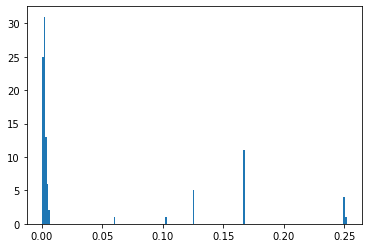

In [20]:
plt.hist(costs, bins=200)
plt.show()

Each peak corresponds to some local minimum.

It is worth noting that although a simple linear regression in variables x and y cannot approximate the XOR function, polynomials can perfectly interpolate. This hints at the fact that approximating continous functions is more interesting.

## A look at a second non-linear function

In [21]:

from data_generation import generate_data_binary

X, z = generate_data_binary(500, 787)

In [22]:
nn = NeuralNetwork([2, 4, 4, 4, 1], "relu", output_activation="sigmoid", regularization=0.000)
wb = nn.wb()
gd = GradientDescent(batch_size=5, store_extra=True)
wb = gd.train(X, wb, z, nn, 0.1, 100)

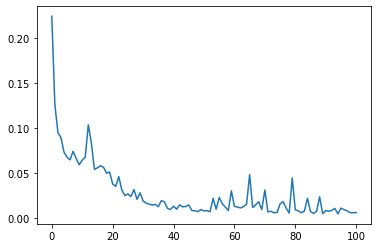

In [23]:
## Plot the cost function
import matplotlib.pyplot as plt
plt.plot(gd.costs)
plt.show()

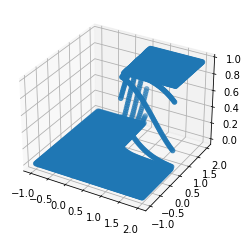

In [24]:
# 3d plot of prediction
X, Y = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

Z = np.hstack([X, Y])

preds = nn.predict(Z, wb)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, preds)
plt.show()

We note that the neural network appears to generalize from this function in a sensible way. While a linear regression (with high polynmial degree) could approximate the function reasonably well on $[0,1] \times [0,1]$, it would go off to infinity. A more relevant comparison in this case would be with logistic regression. (We observe that the sigmoid function applied in the output layer means that the output will remain between 0 and 1)

Now we retry with a linear output layer

In [25]:
X, z = generate_data_binary(500, 787)

In [26]:
nn = NeuralNetwork([2, 4, 4, 4, 1], "relu", output_activation="linear", regularization=0.000)
wb = nn.wb()
gd = GradientDescent(batch_size=5, store_extra=True)
wb = gd.train(X, wb, z, nn, 0.1, 100)

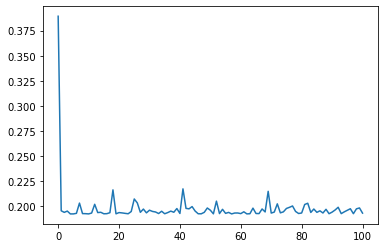

In [27]:
## Plot the cost function
import matplotlib.pyplot as plt
plt.plot(gd.costs)
plt.show()

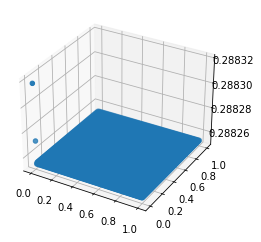

In [28]:
# 3d plot of prediction
X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100)) # On [0, 1] x [0, 1]
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

Z = np.hstack([X, Y])

preds = nn.predict(Z, wb)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, preds)
plt.show()

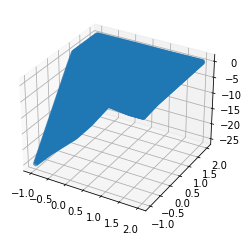

In [29]:
# 3d plot of prediction
X, Y = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100)) # On [-1, 2] x [-1, 2] to show boundary
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

Z = np.hstack([X, Y])

preds = nn.predict(Z, wb)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, preds)
plt.show()

In this case, the neural network appears to simply average the output data - not too impressive. Also we note that the function behaves weirdly outside the data generation domain

We take this analysis into the quantitative world by estimating the distribution over costs for output activation being sigmoid, and then linear. First we do the analysis for the sigmoid output activation:

In [30]:
X, z = generate_data_binary(500, 787)

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

In [31]:
costs = []
T = 100
for _ in range(T):
    nn = NeuralNetwork([2, 4, 4, 4, 1], "relu", output_activation="sigmoid", regularization=0.000)
    wb = nn.wb()
    gd = GradientDescent(batch_size=5, store_extra=True)
    wb = gd.train(X, wb, z, nn, 0.1, 100)

    costs.append(gd.costs[-1])

KeyboardInterrupt: 

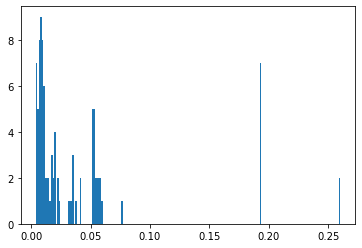

In [ ]:
# Plot a histogram over costs for T runs
plt.hist(costs, bins=200)
plt.show()

In [ ]:
X, z = generate_data_binary(500, 787)

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

Next, we repeat the analysis for the linear activation function

In [ ]:
costs = []
T = 100
for _ in range(T):
    nn = NeuralNetwork([2, 4, 4, 4, 1], "relu", output_activation="linear", regularization=0.000)
    wb = nn.wb()
    gd = GradientDescent(batch_size=5, store_extra=True)
    wb = gd.train(X, wb, z, nn, 0.1, 100)

    costs.append(gd.costs[-1])

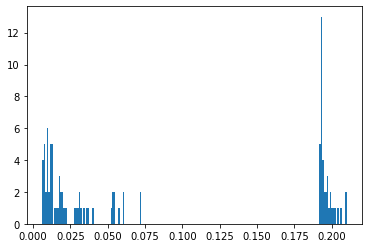

In [ ]:
# Plot a histogram over costs for T runs
plt.hist(costs, bins=200)
plt.show()

We again see that the sigmoid output activation outperforms the linear output activation (by quite a large margin!). As a binary assignment of value is a classification task, it makes sense for the sigmoid output activation to outperform

We now fix the activation layer function as sigmoid, and repeat the analysis for different hidden layer activations. We test ReLU and sigmoid activations, starting with ReLU.

In [ ]:
costs = []
T = 100
for _ in range(T):
    nn = NeuralNetwork([2, 4, 4, 4, 1], "relu", output_activation="sigmoid", regularization=0.000)
    wb = nn.wb()
    gd = GradientDescent(batch_size=5, store_extra=True)
    wb = gd.train(X, wb, z, nn, 0.1, 100)

    costs.append(gd.costs[-1])

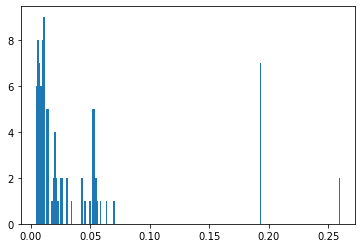

In [ ]:
# Plot a histogram over costs for T runs
plt.hist(costs, bins=200)
plt.show()

In [ ]:
X, z = generate_data_binary(500, 787)

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

Next, we repeat the analysis for the linear activation function

In [ ]:
costs = []
T = 100
for _ in range(T):
    nn = NeuralNetwork([2, 4, 4, 4, 1], "sigmoid", output_activation="sigmoid", regularization=0.000)
    wb = nn.wb()
    gd = GradientDescent(batch_size=5, store_extra=True)
    wb = gd.train(X, wb, z, nn, 0.1, 100)

    costs.append(gd.costs[-1])

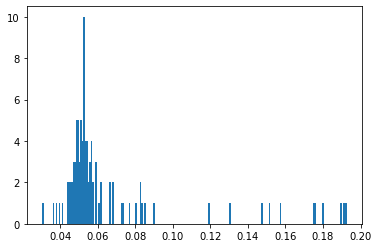

In [ ]:
# Plot a histogram over costs for T runs
plt.hist(costs, bins=200)
plt.show()

ReLU appears to outperform as hidden layer activation.

In [ ]:

from data_generation import generate_data_binary

X, z = generate_data_binary(500, 787)

In [ ]:
nn = NeuralNetwork([2, 4, 4, 4, 1], "sigmoid", output_activation="sigmoid", regularization=0.000)
wb = nn.wb()
gd = GradientDescent(batch_size=5, store_extra=True)
wb = gd.train(X, wb, z, nn, 0.1, 100)

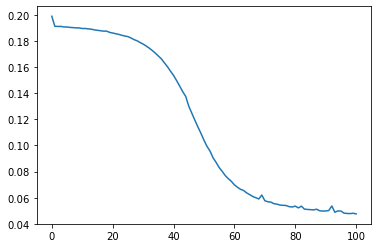

In [ ]:
## Plot the cost function
import matplotlib.pyplot as plt
plt.plot(gd.costs)
plt.show()

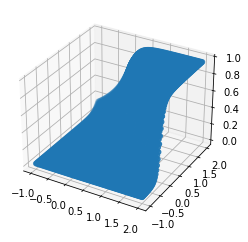

In [ ]:
# 3d plot of prediction
X, Y = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

Z = np.hstack([X, Y])

preds = nn.predict(Z, wb)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, preds)
plt.show()

Decision boundary appears smoother / more gradual with sigmoid activation

## Cross-entropy

In [38]:

from data_generation import generate_data_binary

X, z = generate_data_binary(500, 787)

In [39]:
nn = NeuralNetwork([2, 4, 4, 4, 1], "relu", output_activation="sigmoid", cost_function="cross_entropy", regularization=0.000)
wb = nn.wb()
gd = GradientDescent(batch_size=5, store_extra=True)
wb = gd.train(X, wb, z, nn, 0.1, 100)

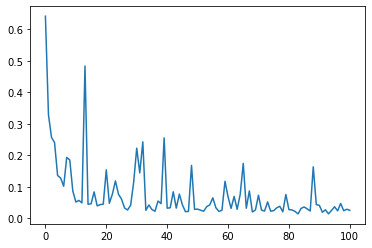

In [40]:
## Plot the cost function
import matplotlib.pyplot as plt
plt.plot(gd.costs)
plt.show()

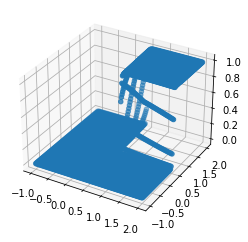

In [41]:
# 3d plot of prediction
X, Y = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

Z = np.hstack([X, Y])

preds = nn.predict(Z, wb)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, preds)
plt.show()